# Merging labels according to edge-to-edge-distances
In this notebook we will merge labels in a label image according to their edge-to-edge distances to each other. Labels close-by will be merged.

See also
* [Image.sc discussion](https://forum.image.sc/t/measure-distances-between-labels/79125)
* [Merging labels using napari-accelerated-pixel-and-object-classifiers](https://github.com/haesleinhuepf/napari-accelerated-pixel-and-object-classification#merging-objects)

In [1]:
import pyclesperanto_prototype as cle
from skimage.io import imread
import numpy as np

For demonstration purposes, we use a modified version of the labels derived from the blobs example-image. We artificially introduce gaps between them.

cl.OCLArray([[ 0,  0,  0, ..., 45, 45, 45],
       [ 0,  0,  0, ..., 45, 45, 45],
       [ 0,  0,  0, ..., 45, 45, 45],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
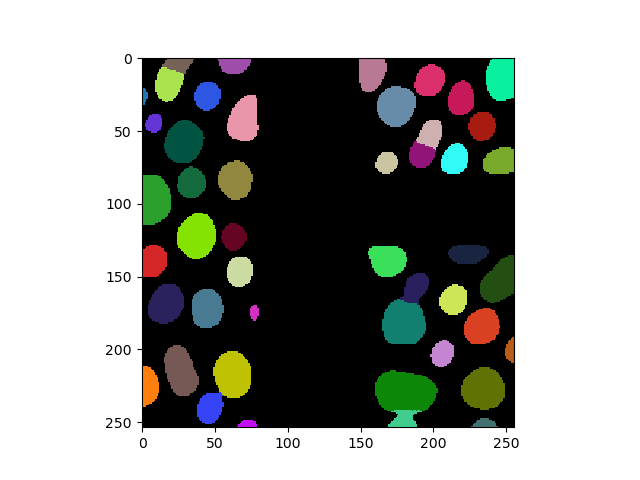

In [2]:
image = imread("../../data/blobs.tif")
image[:, 80:150] = 0
image[80:130, 100:] = 0

image = cle.asarray(image)
labels = cle.voronoi_otsu_labeling(image, spot_sigma=4, outline_sigma=3)
labels

First, we dilate the labels by half of the maximum distance the edges are allowed to have.

cl.OCLArray([[ 0,  0,  0, ..., 45, 45, 45],
       [ 0,  0,  0, ..., 45, 45, 45],
       [ 0,  0,  0, ..., 45, 45, 45],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
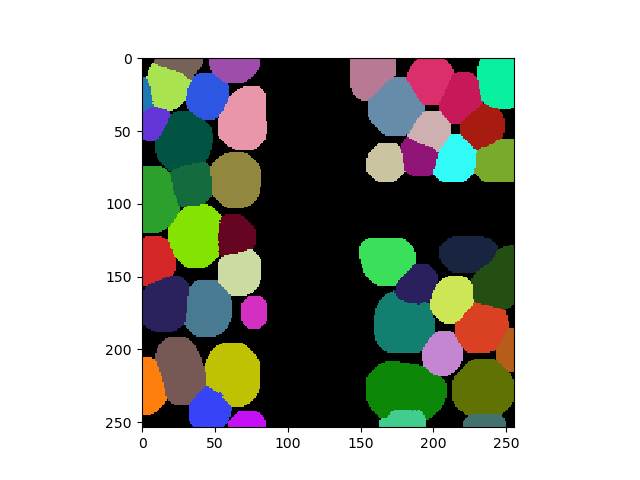

In [3]:
maximum_distance = 12

dilated_labels = cle.dilate_labels(labels, radius=maximum_distance/2)
dilated_labels

We then merge the labels if the touch.

cl.OCLArray([[0, 0, 0, ..., 4, 4, 4],
       [0, 0, 0, ..., 4, 4, 4],
       [0, 0, 0, ..., 4, 4, 4],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
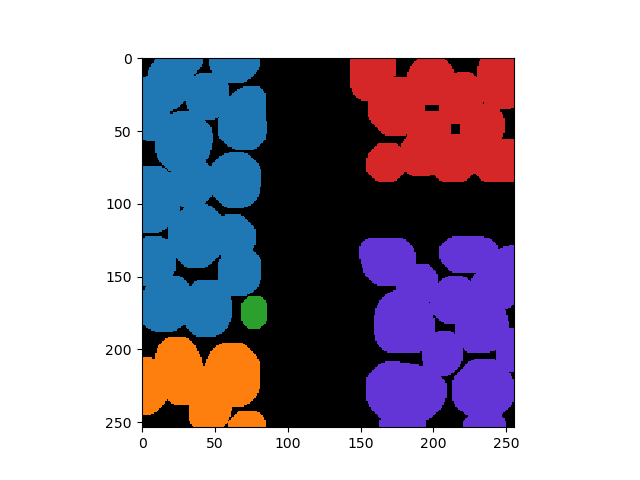

In [4]:
merged_dilated_labels = cle.merge_touching_labels(dilated_labels)
merged_dilated_labels

Afterwards, we mask the merged labels with the original label's shape. We also convert the result of this operation to 32-bit integer, so that the visualization as label-image works.

cl.OCLArray([[0, 0, 0, ..., 4, 4, 4],
       [0, 0, 0, ..., 4, 4, 4],
       [0, 0, 0, ..., 4, 4, 4],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
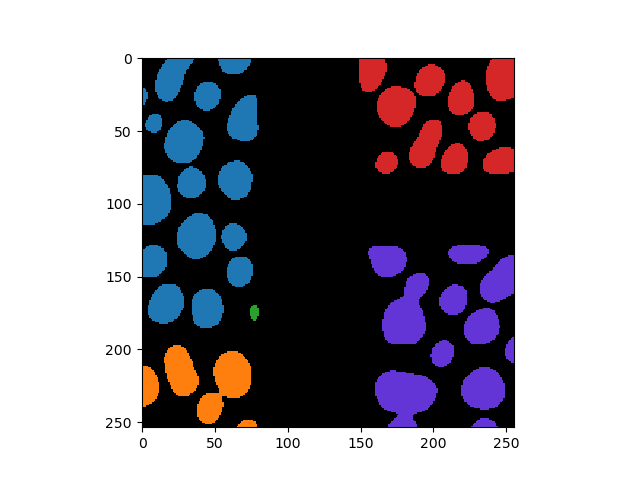

In [5]:
merged_labels = (merged_dilated_labels * (labels > 0)).astype(np.uint32)
merged_labels